In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df_SeqEncoder_srp = pd.read_csv("data/SeqEncoder_srp/metrics.csv")
df_SeqEncoder_tRNA = pd.read_csv("data/SeqEncoder_tRNA/metrics.csv")
df_SimpleCNN_srp = pd.read_csv("data/SimpleCNN_srp/metrics.csv")
df_SimpleCNN_tRNA = pd.read_csv("data/SimpleCNN_tRNA/metrics.csv")
df_SimpleMLP_srp = pd.read_csv("data/SimpleMLP_srp/metrics.csv")
df_SimpleMLP_tRNA = pd.read_csv("data/SimpleMLP_tRNA/metrics.csv")
df_Seq2Motif_srp = pd.read_csv("data/Seq2Motif_srp/metrics.csv")
df_Seq2Motif_tRNA = pd.read_csv("data/Seq2Motif_tRNA/metrics.csv")

In [62]:
# 1. Agregar columna para identificar el origen/modelo

df_SeqEncoder_srp = df_SeqEncoder_srp.assign(model="Encoder", fam="srp")
df_SeqEncoder_tRNA = df_SeqEncoder_tRNA.assign(model="Encoder", fam="tRNA")
df_SimpleCNN_srp = df_SimpleCNN_srp.assign(model="CNN", fam="srp")
df_SimpleCNN_tRNA = df_SimpleCNN_tRNA.assign(model="CNN", fam="tRNA")
df_SimpleMLP_srp = df_SimpleMLP_srp.assign(model="MLP", fam="srp")
df_SimpleMLP_tRNA = df_SimpleMLP_tRNA.assign(model="MLP", fam="tRNA")
df_Seq2Motif_srp = df_Seq2Motif_srp.assign(model="Seq2model", fam="srp")
df_Seq2Motif_tRNA = df_Seq2Motif_tRNA.assign(model="Seq2model", fam="tRNA")
df_Seq2Motif_srp = df_Seq2Motif_srp.assign(model="Seq2model", fam="srp")
df_Seq2Motif_tRNA = df_Seq2Motif_tRNA.assign(model="Seq2model", fam="tRNA")

# 2. Concatenar todos los DataFrames
df_all = pd.concat(
    [
        df_SeqEncoder_srp,
        df_SeqEncoder_tRNA,
        df_SimpleCNN_srp,
        df_SimpleCNN_tRNA,
        df_SimpleMLP_srp,
        df_SimpleMLP_tRNA,
        df_Seq2Motif_srp,
        df_Seq2Motif_tRNA,
    ],
    axis=0,
    ignore_index=True,
    sort=False,  # sort=False para mantener el orden original de las columnas
)

cols = ["model"] + [c for c in df_all.columns if c != "model"]
df_all = df_all[cols]

In [63]:
df_all

,model,run_name,exp,run,arc_features,arc_num_conv,arc_num_params,train_loss,valid_loss,test_loss,...,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq,fam,arc_kernels,arc_skip,arc_encoder_blocks,arc_latent_volume
0,Encoder,enc_f64_64_64,SeqEncoder_srp,enc_f64_64_64,"[64, 64, 64]",2.0,325697,0.011294,0.026555,0.330994,...,0.965913,0.540725,0.0,0.0,0.0,srp,NaN,NaN,NaN,NaN
1,Encoder,enc_f32_64_64,SeqEncoder_srp,enc_f32_64_64,"[32, 64, 64]",2.0,309761,0.012322,0.027523,0.330334,...,0.965052,0.538217,0.0,0.0,0.0,srp,NaN,NaN,NaN,NaN
2,Encoder,enc_f32_32_64,SeqEncoder_srp,enc_f32_32_64,"[32, 32, 64]",2.0,291137,0.013740,0.030854,0.337401,...,0.960446,0.526174,0.0,0.0,0.0,srp,NaN,NaN,NaN,NaN
3,Encoder,enc_f32_32_32,SeqEncoder_srp,enc_f32_32_32,"[32, 32, 32]",2.0,147553,0.011410,0.029003,0.333893,...,0.962177,0.529036,0.0,0.0,0.0,srp,NaN,NaN,NaN,NaN
4,Encoder,enc_f16_64_64,SeqEncoder_srp,enc_f16_64_64,"[16, 64, 64]",2.0,304097,0.021561,0.035675,0.327045,...,0.954860,0.544450,0.0,0.0,0.0,srp,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Seq2model,s2m_skip0_f4_16,Seq2Motif_tRNA,s2m_skip0_f4_16,"[4, 16]",2.0,1497,0.080674,0.094732,0.167938,...,0.855242,0.617790,0.0,0.0,0.0,tRNA,NaN,0.0,1.0,1024.0
496,Seq2model,s2m_skip1_f4_8,Seq2Motif_tRNA,s2m_skip1_f4_8,"[4, 8]",2.0,729,0.096445,0.109073,0.160710,...,0.830209,0.623294,0.0,0.0,0.0,tRNA,NaN,1.0,1.0,512.0
497,Seq2model,s2m_skip0_f4_8,Seq2Motif_tRNA,s2m_skip0_f4_8,"[4, 8]",2.0,681,0.107007,0.111690,0.155597,...,0.824394,0.643481,0.0,0.0,0.0,tRNA,NaN,0.0,1.0,512.0
498,Seq2model,s2m_skip1_f4_4,Seq2Motif_tRNA,s2m_skip1_f4_4,"[4, 4]",2.0,465,0.115636,0.121126,0.159180,...,0.809525,0.621987,0.0,0.0,0.0,tRNA,NaN,1.0,1.0,256.0


Estadísticas de train_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,100.0,0.831402,0.043492,0.835957,0.736493,0.895171
Encoder,100.0,0.972424,0.029444,0.980861,0.825604,0.992151
MLP,100.0,0.874496,0.050084,0.876017,0.702111,0.959950
Seq2model,200.0,0.940520,0.037898,0.951912,0.817955,0.987298


Estadísticas de valid_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,100.0,0.819611,0.041304,0.822134,0.727802,0.879018
Encoder,100.0,0.942720,0.027758,0.947302,0.798035,0.969495
MLP,100.0,0.859868,0.053928,0.855634,0.694034,0.952021
Seq2model,200.0,0.920001,0.036665,0.932086,0.796923,0.967016


Estadísticas de test_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,100.0,0.594503,0.013224,0.595145,0.569017,0.622810
Encoder,100.0,0.533619,0.011606,0.532874,0.494716,0.558641
MLP,100.0,0.532526,0.012937,0.533011,0.500989,0.588886
Seq2model,200.0,0.588402,0.026506,0.584474,0.536204,0.647639


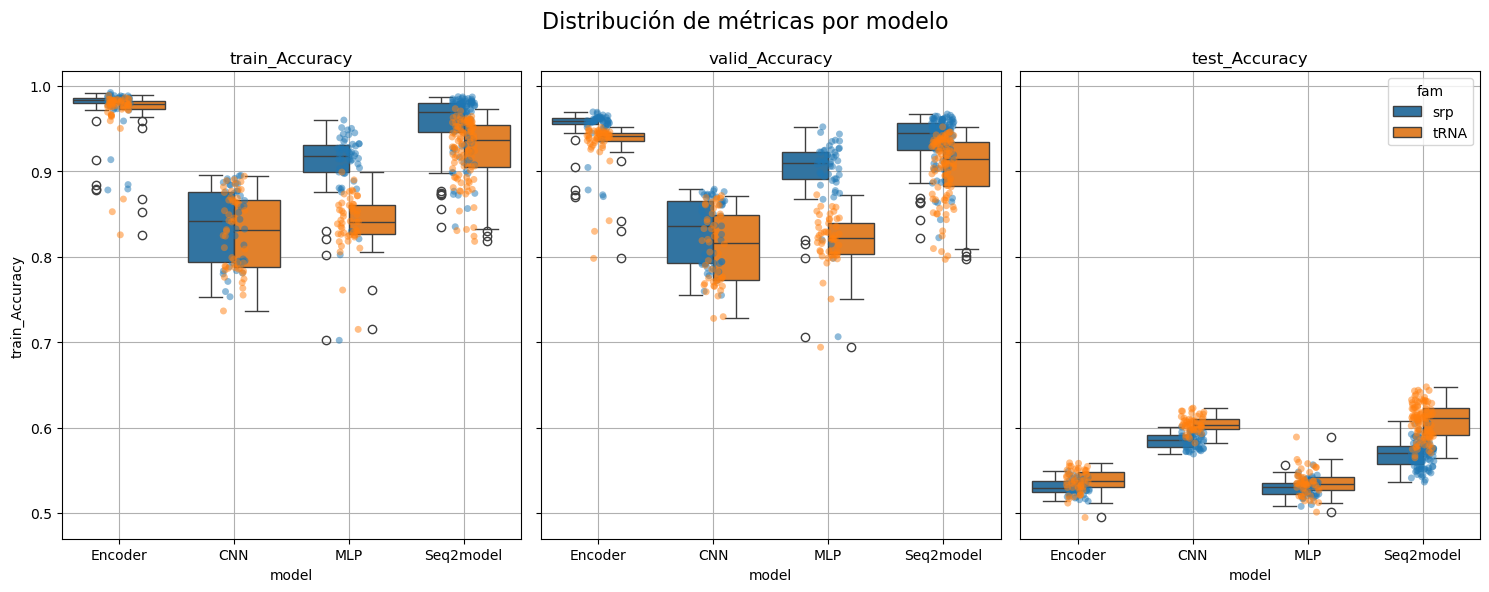

In [84]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True
    stats[metric] = df_all.groupby("model")[metric].describe()[
        ["count", "mean", "std", "50%", "min", "max"]
    ]
    print(f"Estadísticas de {metric}")
    display(stats[metric])

    sns.boxplot(data=df_all, x="model", y=metric, hue="fam", ax=ax[i], legend=legend)
    sns.stripplot(
        data=df_all, x="model", y=metric, hue="fam", ax=ax[i], alpha=0.5, legend=False
    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

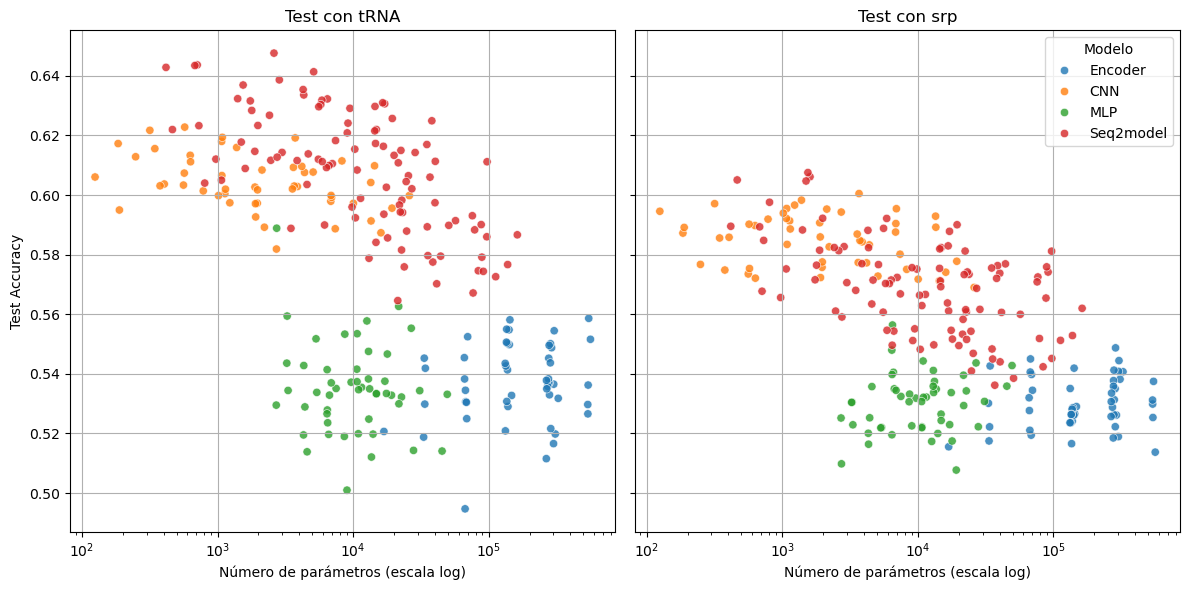

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="arc_num_params",
    y="test_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[0],
    legend=False,
)
ax[0].set_xscale("log")
ax[0].set_xlabel("Número de parámetros (escala log)")
ax[0].set_ylabel("Test Accuracy")
ax[0].set_title("Test con tRNA")
ax[0].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "srp"],
    x="arc_num_params",
    y="test_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[1],
)
ax[1].set_xscale("log")
ax[1].set_xlabel("Número de parámetros (escala log)")
ax[1].set_ylabel("Test Accuracy")
ax[1].set_title("Test con srp")
ax[1].legend(title="Modelo")
ax[1].grid()
fig.tight_layout()
plt.show()

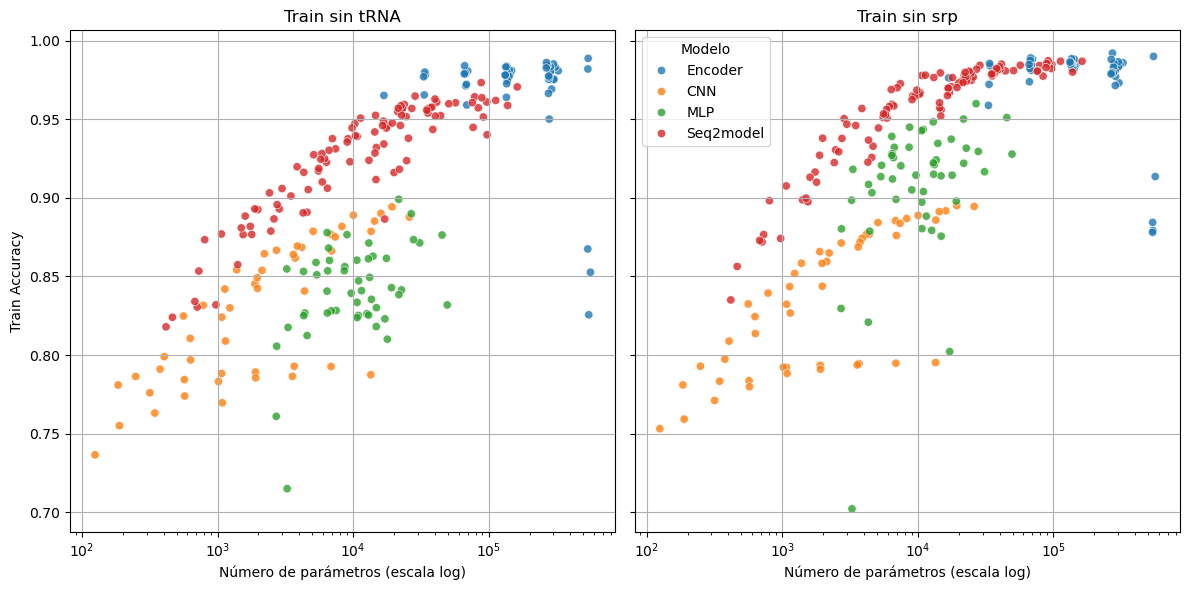

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="arc_num_params",
    y="train_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[0],
    legend=False,
)
ax[0].set_xscale("log")
ax[0].set_xlabel("Número de parámetros (escala log)")
ax[0].set_ylabel("Train Accuracy")
ax[0].set_title("Train sin tRNA")
ax[0].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "srp"],
    x="arc_num_params",
    y="train_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[1],
)
ax[1].set_xscale("log")
ax[1].set_xlabel("Número de parámetros (escala log)")
ax[1].set_ylabel("Train Accuracy")
ax[1].set_title("Train sin srp")
ax[1].legend(title="Modelo")
ax[1].grid()
fig.tight_layout()
plt.show()

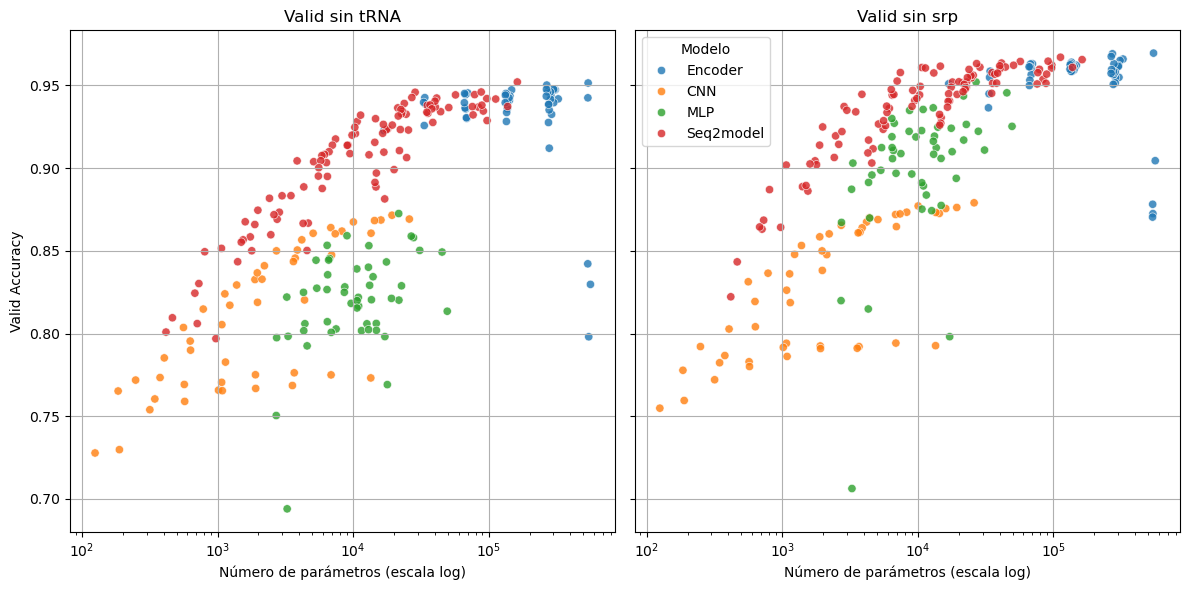

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="arc_num_params",
    y="valid_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[0],
    legend=False,
)
ax[0].set_xscale("log")
ax[0].set_xlabel("Número de parámetros (escala log)")
ax[0].set_ylabel("Valid Accuracy")
ax[0].set_title("Valid sin tRNA")
ax[0].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "srp"],
    x="arc_num_params",
    y="valid_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[1],
)
ax[1].set_xscale("log")
ax[1].set_xlabel("Número de parámetros (escala log)")
ax[1].set_ylabel("Valid Accuracy")
ax[1].set_title("Valid sin srp")
ax[1].legend(title="Modelo")
ax[1].grid()
fig.tight_layout()
plt.show()

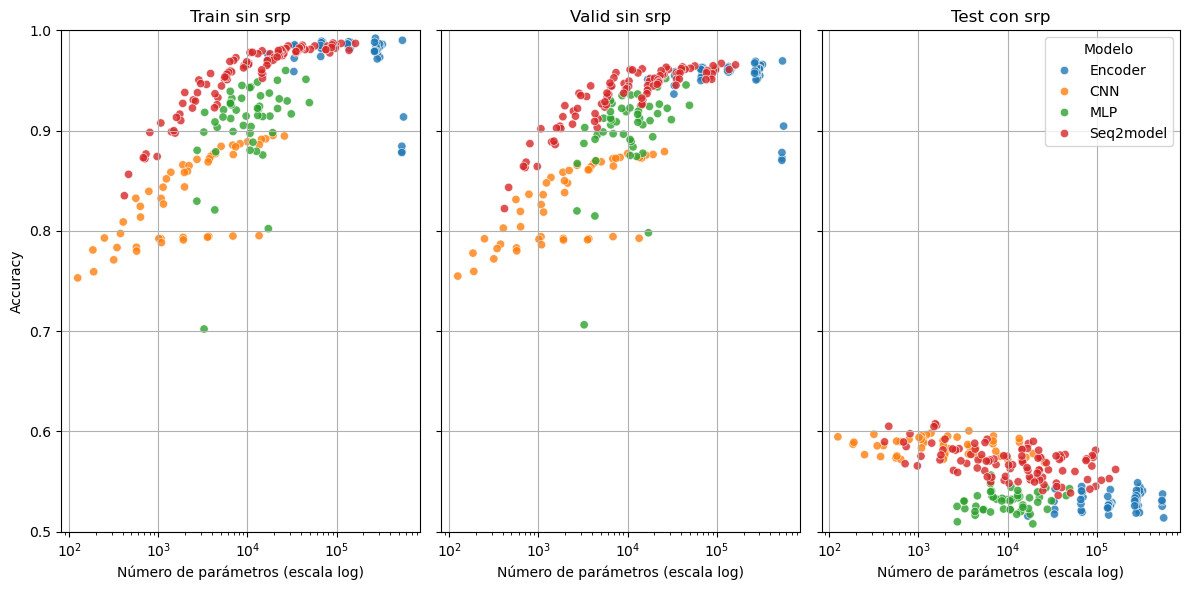

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

sns.scatterplot(
    data=df_all[df_all["fam"] == "srp"],
    x="arc_num_params",
    y="train_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[0],
    legend=False,
)
ax[0].set_xscale("log")
ax[0].set_xlabel("Número de parámetros (escala log)")
ax[0].set_ylim(0.5, 1)
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Train sin srp")
ax[0].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "srp"],
    x="arc_num_params",
    y="valid_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[1],
    legend=False,
)
ax[1].set_xscale("log")
ax[1].set_xlabel("Número de parámetros (escala log)")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Valid sin srp")
ax[1].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "srp"],
    x="arc_num_params",
    y="test_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[2],
)
ax[2].set_xscale("log")
ax[2].set_xlabel("Número de parámetros (escala log)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Test con srp")
ax[2].legend(title="Modelo")
ax[2].grid()
fig.tight_layout()
plt.show()

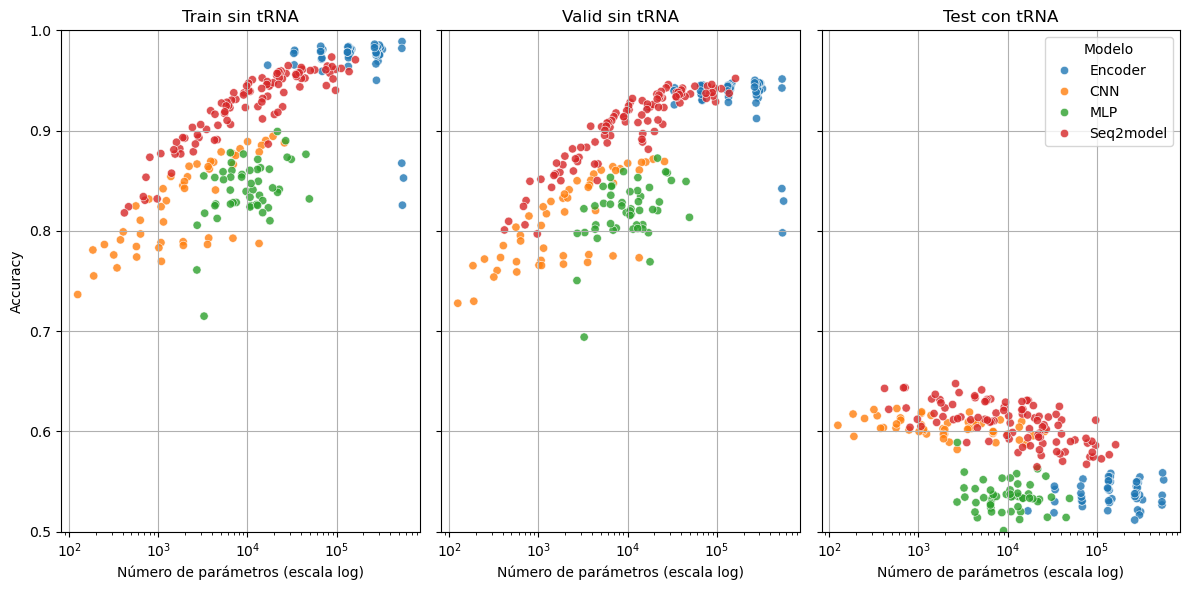

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="arc_num_params",
    y="train_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[0],
    legend=False,
)
ax[0].set_xscale("log")
ax[0].set_xlabel("Número de parámetros (escala log)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Train sin tRNA")
ax[0].grid()
ax[0].set_ylim(0.5, 1)

sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="arc_num_params",
    y="valid_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[1],
    legend=False,
)
ax[1].set_xscale("log")
ax[1].set_xlabel("Número de parámetros (escala log)")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Valid sin tRNA")
ax[1].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="arc_num_params",
    y="test_Accuracy",
    hue="model",
    alpha=0.8,
    ax=ax[2],
)
ax[2].set_xscale("log")
ax[2].set_xlabel("Número de parámetros (escala log)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Test con tRNA")
ax[2].legend(title="Modelo")
ax[2].grid()
fig.tight_layout()
plt.show()

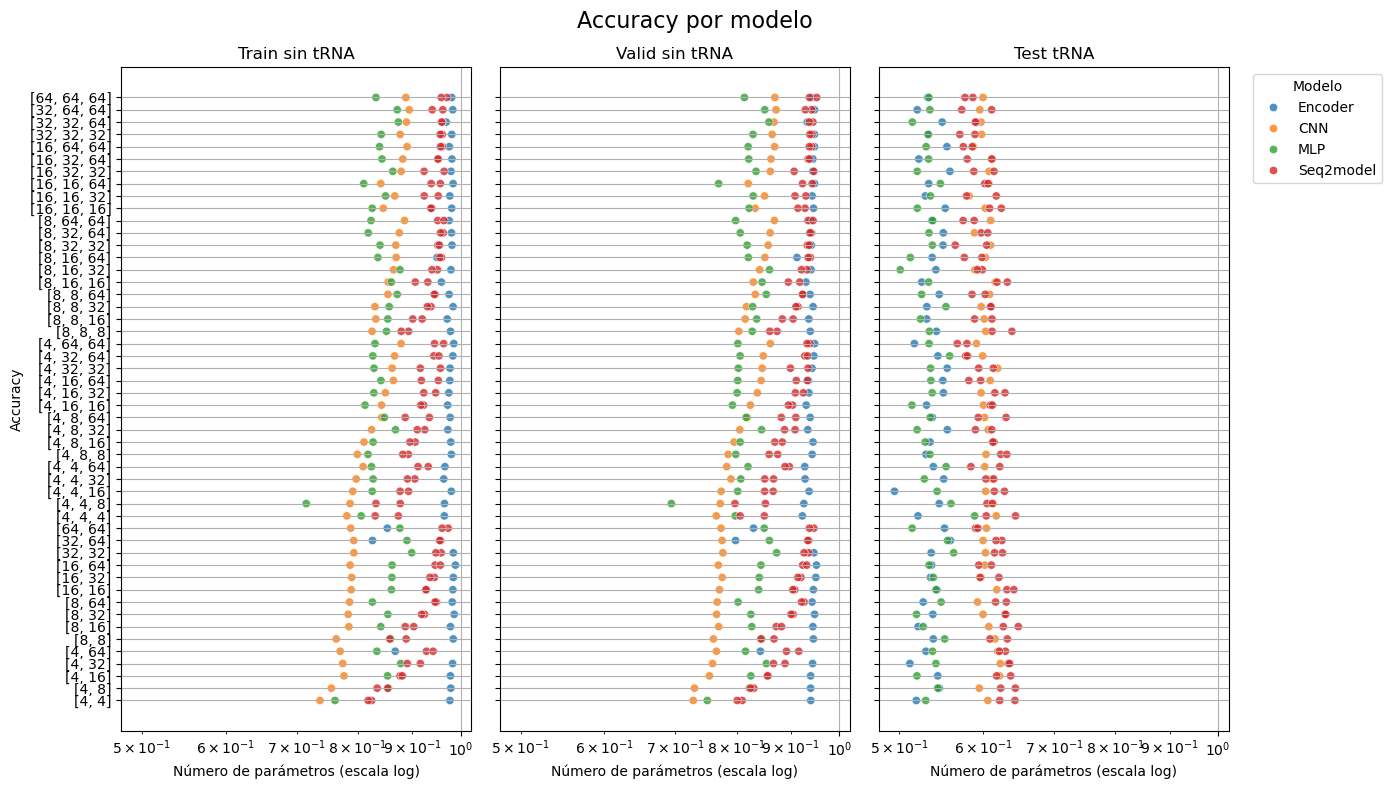

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True, sharex=True)

sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="train_Accuracy",
    y="arc_features",
    hue="model",
    alpha=0.8,
    ax=ax[0],
    legend=False,
)
ax[0].set_xscale("log")
ax[0].set_xlabel("Número de parámetros (escala log)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Train sin tRNA")
ax[0].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="valid_Accuracy",
    y="arc_features",
    hue="model",
    alpha=0.8,
    ax=ax[1],
    legend=False,
)
ax[1].set_xscale("log")
ax[1].set_xlabel("Número de parámetros (escala log)")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Valid sin tRNA")
ax[1].grid()
sns.scatterplot(
    data=df_all[df_all["fam"] == "tRNA"],
    x="test_Accuracy",
    y="arc_features",
    hue="model",
    alpha=0.8,
    ax=ax[2],
)
ax[2].set_xscale("log")
ax[2].set_xlabel("Número de parámetros (escala log)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Test tRNA")
ax[2].legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc="upper left")
ax[2].grid()
fig.suptitle("Accuracy por modelo", fontsize=16)
fig.tight_layout()
plt.show()